In [11]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import yaml
import json

In [52]:
mapper = yaml.safe_load(open('plot_mapper.yml'))
models = yaml.safe_load(open('../score.yml'))['models']
lang_fam_map = mapper['lang_family_dict']
lang_list = list(lang_fam_map.keys())

model_name_map = mapper['model_name_dict']

ACCURACY_OE_PATH = '../json/{model}_accuracy_oe{oe_mode}.json'

In [53]:
d = []

for model in models:
    acc_oe_single = json.load(open(ACCURACY_OE_PATH.format(model=model, oe_mode='')))
    acc_oe_dual = json.load(open(ACCURACY_OE_PATH.format(model=model, oe_mode='_dual')))
    acc_oe_multi = json.load(open(ACCURACY_OE_PATH.format(model=model, oe_mode='_multi')))


    for task in ['1a. Dish Name (No-Context)', '1b. Dish Name (Contextualized)', '1c. Dish Name (Adversarial)', '2. Regional Cuisine']:
        d.append({
            'model': model,
            'task': task.split('.')[0],
            'acc_oe_single': acc_oe_single[task]['avg_score'],
            'acc_oe_dual': acc_oe_dual[task]['avg_score'],
            'acc_oe_multi': acc_oe_multi[task]['avg_score'],
        })

In [54]:
df = pd.DataFrame(d)
df['model'] = df['model'].map(model_name_map)
df

,model,task,acc_oe_single,acc_oe_dual,acc_oe_multi
0,Gemini1.5 Flash,1a,12.81,15.37,17.09
1,Gemini1.5 Flash,1b,15.16,17.91,22.27
2,Gemini1.5 Flash,1c,6.46,7.71,8.71
3,Gemini1.5 Flash,2,30.03,34.82,36.49
4,GPT4o,1a,18.77,20.25,21.88
...,...,...,...,...,...
63,Phi-3.5 Vision 4B,2,7.58,8.93,9.22
64,NVLM-D 72B,1a,2.83,4.08,4.71
65,NVLM-D 72B,1b,7.06,9.37,10.29
66,NVLM-D 72B,1c,2.05,2.55,2.89


In [99]:
df_model = df.groupby('model').mean().reset_index()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_33284\4165181013.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_model = df.groupby('model').mean().reset_index()


In [100]:
df_model

,model,acc_oe_single,acc_oe_dual,acc_oe_multi
0,Aria 25B,6.9875,7.8650,8.4375
1,GPT4o,23.8575,25.6575,27.8275
2,GPT4o-mini,13.5025,14.4650,15.6650
3,Gemini1.5 Flash,16.1150,18.9525,21.1400
4,Llama 3.2 Instruct 11B,11.0600,20.0025,21.6700
5,Llama 3.2 Instruct 90B,17.6075,19.2150,20.6775
6,Llava1.6 Vicuna 13B,4.2350,4.9675,5.3425
7,Llava1.6 Vicuna 7B,3.3150,3.9475,4.0800
8,Molmo-D 7B,3.7475,4.5850,5.0775
9,Molmo-E 1B,0.4250,0.4375,0.4475


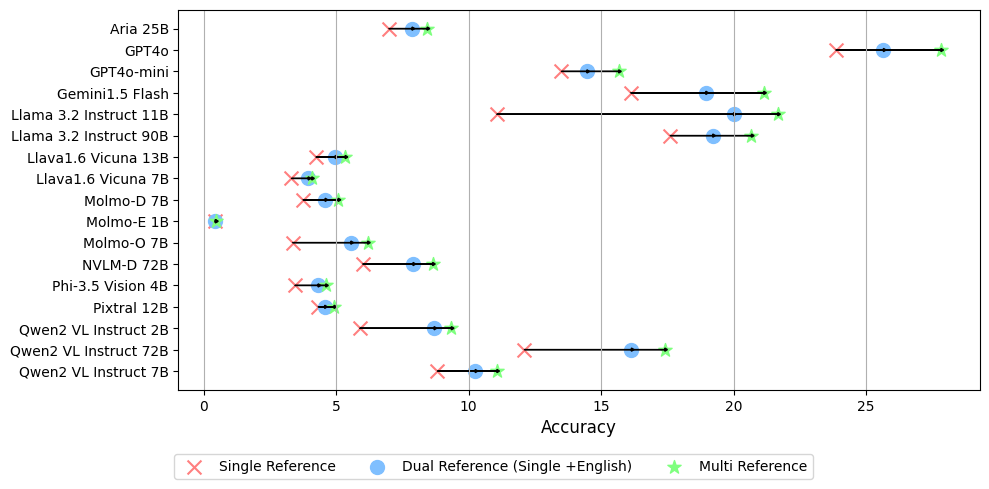

In [101]:
models = df_model['model'].to_list()[::-1]
single = df_model['acc_oe_single'].to_list()[::-1]
dual = df_model['acc_oe_dual'].to_list()[::-1]
multi = df_model['acc_oe_multi'].to_list()[::-1]

fig, ax = plt.subplots(figsize=(10, 5))

ax.scatter(single, models, color='#FF7F7F', marker='x', label='Single Reference', s=100)
ax.scatter(dual, models, color='#7FBFFF', marker='o', label='Dual Reference (Single +English)', s=100)
ax.scatter(multi, models, color='#7FFF7F', marker='*', label='Multi Reference', s=100)
for i in range(len(models)):
    ax.arrow(single[i], i, dual[i] - single[i], 0, head_width=0.15, head_length=0.1, fc='black', ec='black')
    ax.arrow(dual[i], i, multi[i] - dual[i], 0, head_width=0.15, head_length=0.1, fc='black', ec='black')

ax.set_xlabel('Accuracy', fontsize=12)
plt.legend(bbox_to_anchor=(0.8, -0.15), ncol=3)
plt.grid(axis='x')
plt.tight_layout()
plt.show()

In [82]:
df_task = df.groupby('task').mean().reset_index()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_33284\2873070483.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_task = df.groupby('task').mean().reset_index()


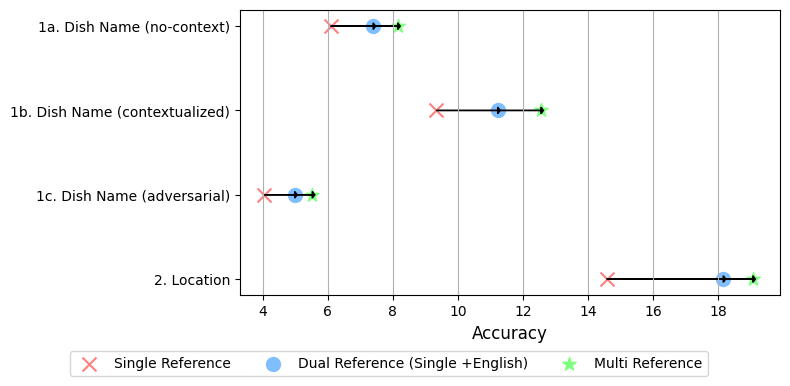

In [98]:
task = ['1a. Dish Name (no-context)', '1b. Dish Name (contextualized)', '1c. Dish Name (adversarial)', '2. Location'][::-1]
single = df_task['acc_oe_single'].to_list()[::-1]
dual = df_task['acc_oe_dual'].to_list()[::-1]
multi = df_task['acc_oe_multi'].to_list()[::-1]

fig, ax = plt.subplots(figsize=(8, 4))

ax.scatter(single, task, color='#FF7F7F', marker='x', label='Single Reference', s=100)
ax.scatter(dual, task, color='#7FBFFF', marker='o', label='Dual Reference (Single +English)', s=100)
ax.scatter(multi, task, color='#7FFF7F', marker='*', label='Multi Reference', s=100)
for i in range(len(task)):
    ax.arrow(single[i], i, dual[i] - single[i], 0, head_width=0.08, head_length=0.08, fc='black', ec='black')
    ax.arrow(dual[i], i, multi[i] - dual[i], 0, head_width=0.08, head_length=0.08, fc='black', ec='black')

ax.set_xlabel('Accuracy', fontsize=12)
plt.legend(bbox_to_anchor=(0.88, -0.17), ncol=3)
plt.grid(axis='x')
plt.tight_layout()
plt.show()